In [292]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
sns.set_theme()

<Axes: xlabel='x', ylabel='y'>

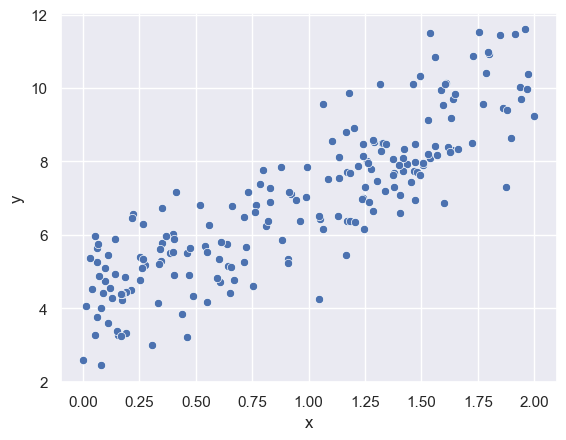

In [293]:
data = pd.DataFrame()

data["x"] = pd.read_csv("X.csv")
data["y"] = pd.read_csv("y.csv")

sns.scatterplot(data = data, x= "x" , y = "y")

In [294]:
x = data["x"].to_numpy()
y = data["y"].to_numpy()

In [295]:
len(x)

199

In [296]:
def run_mini_batch(theta, learning_rate, batch_size, x, y):
    indices = np.random.choice(len(x), size=batch_size, replace=False)
    x_subset = x[indices]
    y_subset = y[indices]

    x_b = np.c_[np.ones(batch_size), x_subset]

    gradients = 2/batch_size * np.dot(x_b.T, np.dot(x_b, theta) - y_subset)
    theta_n = theta - learning_rate*gradients
    
    return theta_n

In [297]:
def get_mean_squared_error(theta, x, y):
    y_pred = theta[0] + theta[1]*x
    mse = np.sum((y-y_pred)**2) / len(x)
    
    return mse

In [298]:
def plot_batch(theta, current_iter, n_iterations):
    x_pred = np.arange(0,3, 0.5)
    y_pred = theta[0] + theta[1]*x_pred
    y_pred
    
    if current_iter != n_iterations - 1:
        sns.lineplot(x = x_pred, y = y_pred, color = "#4c72b0")
    else:
        sns.lineplot(x = x_pred, y = y_pred, label = f"Iteration: {current_iter+1}", color = "magenta")

In [299]:
learning_rate = 0.1
batch_size = 10
m = batch_size
n_iterations = 50

theta = np.empty((n_iterations, 2))
theta[0] = np.random.randn(2)
mse = np.empty((n_iterations))
mse[0] = get_mean_squared_error(theta[0], x, y)



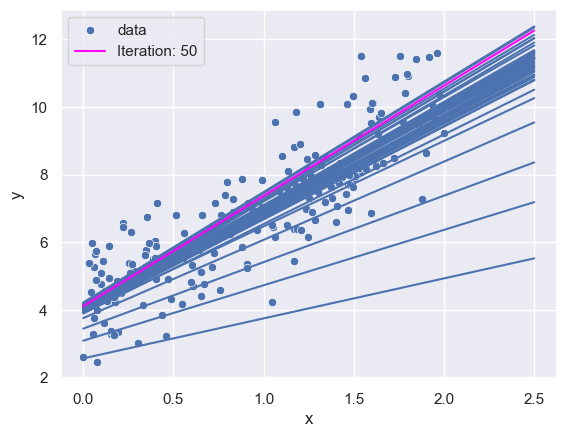

In [300]:
sns.scatterplot(data = data, x = "x", y = "y", label = "data")

for i in range(1, n_iterations):
    theta[i] = run_mini_batch(theta[i-1], learning_rate, batch_size, x, y)
    plot_batch(theta[i], i, n_iterations)
    mse[i] = get_mean_squared_error(theta[i],x, y)

<Axes: >

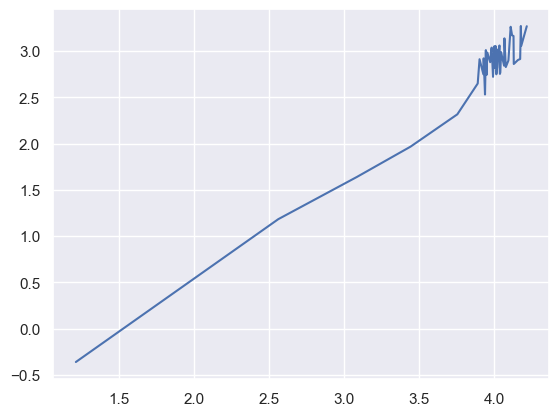

In [306]:
theta_0 = theta[:, 0]
theta_1 = theta[:, 1]

sns.lineplot(x = theta_0, y = theta_1)

<Axes: >

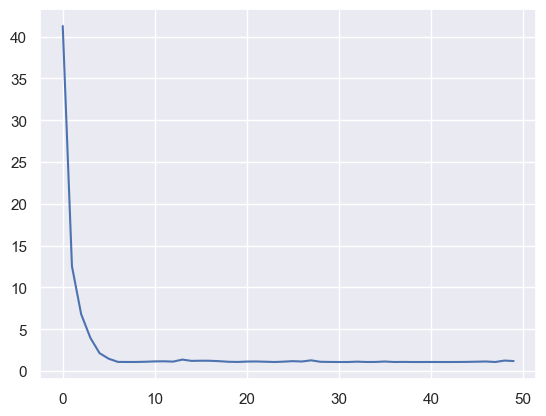

In [307]:
sns.lineplot(x = np.arange(n_iterations), y = mse)